In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir, mkdir
from scipy.stats import norm

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
twomass_dir = join(root_data_dir, "TWOMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

In [3]:
name = "Completeness"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in gaia dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [4]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-004-005.hdf5']

In [5]:
tmass_ = vaex.open_many(twomass_files)
tmass_["JK"] = tmass_["Jmag"] - tmass_["Kmag"]
tmass_ = tmass_.extract()
tmass_

#,ra,dec,Jmag,Kmag,designation,ph_qual,JK
0,0.035724,-89.033127,15.052,14.149,00000857-8901592,UCU,0.9029999
1,0.063679,-89.064964,16.05,14.818,00001528-8903538,ABB,1.2319994
2,0.065677,-89.440903,16.832,15.721,00001576-8926272,CCD,1.111001
3,0.067073,-89.130386,15.453,14.788,00001609-8907493,AAB,0.66499996
4,0.073027,-89.090446,16.496,15.626,00001752-8905256,BCD,0.8699999
...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,23591442+8919272,AAA,0.7649994
"470,994,548",359.823644,89.644913,16.03,15.244,23591767+8938416,ACC,0.78600025
"470,994,549",359.843856,89.67437,15.542,14.9,23592252+8940277,ABB,0.6420002
"470,994,550",359.851795,89.1772,12.139,11.642,23592443+8910379,AAA,0.49699974


In [6]:
ph_qual_filter = tmass_['ph_qual'].str.contains('^A.+A$')
tmass = tmass_[ph_qual_filter]
tmass = tmass.filter("Jmag > 0").filter("Jmag < 13.5")
tmass = tmass.extract()
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual,JK
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA,0.44400024
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA,0.9390001
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA,0.43900013
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA,0.36299992
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA,0.34800053
...,...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA,0.4119997
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA,0.5489998
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA,0.7080002
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA,0.5789995


In [10]:
# gc = SkyCoord(ra=tmass.ra.to_numpy()*u.degree, dec=tmass.dec.to_numpy()*u.degree, frame='icrs', equinox='J2000')
# tmass["l"] = gc.galactic.l.value*np.pi/180
# tmass["b"] = gc.galactic.b.value*np.pi/180
# tmass = tmass.extract()
# tmass

In [7]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [8]:
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gspphot,4.204100131988525,0.007100105285644531,0.0067996978759765625,0.0,gspphot,-0.5670999884605408,0.014299988746643066,0.01569998264312744,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [9]:
gaia_raw["JK"] = gaia_raw["Jmag"] - gaia_raw["Kmag"]
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.44400024
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,0.9390001
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.43900013
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.36299992
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gspphot,4.204100131988525,0.007100105285644531,0.0067996978759765625,0.0,gspphot,-0.5670999884605408,0.014299988746643066,0.01569998264312744,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.34800053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

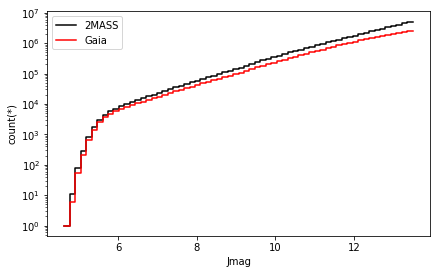

In [10]:
tmass.viz.histogram("Jmag", c='k', label="2MASS")
gaia_raw.viz.histogram("Jmag", c='r', label="Gaia")
plt.legend()
plt.yscale("log")
plt.show()

In [11]:
# partition in J and J-K
eJ = np.linspace(4, 13.5, 51)
eJK = np.linspace(-1, 2, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [12]:
gaiaH, _, _ = np.histogram2d(gaia_raw["JK"].to_numpy(), gaia_raw["Jmag"].to_numpy(), bins=(eJK, eJ))
gaiaH = gaiaH.T
tmassH, _, _ = np.histogram2d(tmass["JK"].to_numpy(), tmass["Jmag"].to_numpy(), bins=(eJK, eJ))
tmassH = tmassH.T
comp = np.nan_to_num(gaiaH/tmassH)
more_than_one = comp > 1
comp[more_than_one] = 1
comp

<ipython-input-12-ae2dc134c428>:5: RuntimeWarning: invalid value encountered in divide
  comp = np.nan_to_num(gaiaH/tmassH)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00265649, 0.00162305,
        0.00138892],
       [0.        , 0.        , 0.        , ..., 0.00182615, 0.00170397,
        0.00177403],
       [0.        , 0.        , 0.        , ..., 0.00177897, 0.00155931,
        0.00115915]])

Text(0, 0.5, 'J')

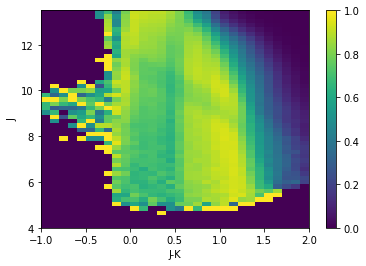

In [13]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

Text(0, 0.5, 'J')

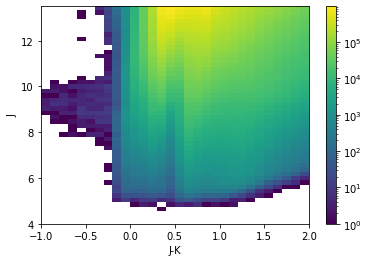

In [14]:
from matplotlib import colors

plt.imshow(tmassH, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto", norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

In [15]:
gaia = gaia_raw[["Jmag", "Kmag", "ra", "dec", "GLON", "GLAT", "rv", "e_rv", "rv_cat", "pmra", "e_pmra", "pmdec", "e_pmdec", "parallax", "e_parallax", "mh", "mh_cat"]]
gaia["JK"] = gaia["Jmag"]-gaia["Kmag"]
gaia["Dist"] = gaia.evaluate("1000/parallax")
gaia["ra"] = gaia["ra"]*np.pi/180
gaia["dec"] = gaia["dec"]*np.pi/180
gaia["GLON"] = gaia["GLON"]*np.pi/180
gaia["GLAT"] = gaia["GLAT"]*np.pi/180
gaia = gaia[gaia.rv.notnan()]
gaia = gaia.extract()
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"24,094,479",12.791,12.414,6.267854631736042,1.550715685432171,2.1402607215749123,0.45396477655639544,-4.409039497375488,3.751502752304077,gaia,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,-0.5562999844551086,gspphot,0.3770008,1676.8383812684935
"24,094,480",13.072,12.66,6.274054774277411,1.5426604324288566,2.138349993956621,0.44609432714811026,-78.52452850341797,4.588349342346191,gaia,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,-1.2724000215530396,gspphot,0.4119997,838.5450134792355
"24,094,481",12.469,11.92,6.2780354514221886,1.538612420481536,2.1374666457120224,0.44212398756383203,-8.928035736083984,2.753666400909424,gaia,24.276081384949727,0.017281681,-0.3033332281423549,0.016044414,2.635903040983505,0.014043435,-0.16740000247955322,gspphot,0.5489998,379.3766251837857
"24,094,482",12.976,12.268,6.279691995775134,1.5530859123695495,2.1411091771102093,0.456221739634114,-27.380125045776367,9.952363967895508,gaia,-1.1558347554809572,0.024979863,10.246756138155417,0.023094444,2.8844735007745492,0.021700282,0.48969998955726624,gspphot,0.7080002,346.6837187900934


In [16]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180

C1 = np.sin(delta_G)*np.cos(gaia.dec) - np.cos(delta_G)*np.sin(gaia.dec)*np.cos(gaia.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(gaia.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

gaia["pmlon"] = 1/cosb*(C1*gaia.pmra+C2*gaia.pmdec)
gaia["pmlat"] = 1/cosb*(-1*C2*gaia.pmra+C1*gaia.pmdec)
gaia["e_pmlon"] = 1/cosb*np.sqrt((C1*gaia.e_pmra)**2 + (C2*gaia.e_pmdec)**2)
gaia["e_pmlat"] = 1/cosb*np.sqrt((C2*gaia.e_pmra)**2 + (C1*gaia.e_pmdec)**2)
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"24,094,479",12.791,12.414,6.267854631736042,1.550715685432171,2.1402607215749123,0.45396477655639544,-4.409039497375488,3.751502752304077,gaia,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,-0.5562999844551086,gspphot,0.3770008,1676.8383812684935,-1.794023780441325,-3.6082221482550256,0.014717576436281164,0.0171396785172635
"24,094,480",13.072,12.66,6.274054774277411,1.5426604324288566,2.138349993956621,0.44609432714811026,-78.52452850341797,4.588349342346191,gaia,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,-1.2724000215530396,gspphot,0.4119997,838.5450134792355,8.869071772970019,-4.870820981813946,0.019430150922776675,0.017432393995713856
"24,094,481",12.469,11.92,6.2780354514221886,1.538612420481536,2.1374666457120224,0.44212398756383203,-8.928035736083984,2.753666400909424,gaia,24.276081384949727,0.017281681,-0.3033332281423549,0.016044414,2.635903040983505,0.014043435,-0.16740000247955322,gspphot,0.5489998,379.3766251837857,23.590732073773466,-5.735634113106756,0.017221670441990748,0.016108810811409857
"24,094,482",12.976,12.268,6.279691995775134,1.5530859123695495,2.1411091771102093,0.456221739634114,-27.380125045776367,9.952363967895508,gaia,-1.1558347554809572,0.024979863,10.246756138155417,0.023094444,2.8844735007745492,0.021700282,0.48969998955726624,gspphot,0.7080002,346.6837187900934,1.1689975837239772,10.245262807075814,0.024888649606755322,0.023192714748897975


In [17]:
# calculate vertical velocities and their errors
gaia['vb'] = 4.74*gaia["pmlat"]/gaia["parallax"]
gaia["vphi"] = 4.74*gaia["pmlon"]/gaia["parallax"]
gaia["e_vb"] = gaia['vb']*np.sqrt((gaia["e_pmlat"]/gaia["pmlat"])**2 + (gaia["e_parallax"]/gaia["parallax"])**2)
gaia["e_vphi"] = gaia['vphi']*np.sqrt((gaia["e_pmlon"]/gaia["pmlon"])**2 + (gaia["e_parallax"]/gaia["parallax"])**2)

gaia["w"] = gaia["vb"]*np.cos(gaia.GLAT) + gaia["rv"]*np.sin(gaia.GLAT)
gaia["e_w"] = np.sqrt(gaia["e_vb"]**2*np.cos(gaia.GLAT)**2 + gaia["e_rv"]**2*np.sin(gaia.GLAT)**2)
gaia["v_xy"] = gaia["rv"]*np.cos(gaia.GLAT) - gaia["vb"]*np.sin(gaia.GLAT)
gaia["e_v_xy"] = np.sqrt(gaia["e_rv"]**2*np.cos(gaia.GLAT)**2 + gaia["e_vb"]**2*np.sin(gaia.GLAT)**2)
gaia["v"] = gaia["vphi"]*np.sin(gaia.GLON) + gaia["v_xy"]*np.cos(gaia.GLON)
gaia["e_v"] = np.sqrt(gaia["e_vphi"]**2*np.sin(gaia.GLON)**2 + gaia["e_v_xy"]**2*np.cos(gaia.GLON)**2)
gaia["u"] = gaia["vphi"]*np.cos(gaia.GLON) - gaia["v_xy"]*np.sin(gaia.GLON)
gaia["e_u"] = np.sqrt(gaia["e_vphi"]**2*np.cos(gaia.GLON)**2 + gaia["e_v_xy"]**2*np.sin(gaia.GLON)**2)
gaia

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"24,094,479",12.791,12.414,6.267854631736042,1.550715685432171,2.1402607215749123,0.45396477655639544,-4.409039497375488,3.751502752304077,gaia,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,-0.5562999844551086,gspphot,0.3770008,1676.8383812684935,-1.794023780441325,-3.6082221482550256,0.014717576436281164,0.0171396785172635,-28.67892153123778,-14.259284797454447,-0.6402295402670302,-0.332305291368251,-27.70769666441053,1.742871445258479,8.61415782519246,3.3832034952213887,-16.653616027585105,1.845502835271016,0.4335794944418616,2.8549276666416965
"24,094,480",13.072,12.66,6.274054774277411,1.5426604324288566,2.138349993956621,0.44609432714811026,-78.5245285

In [18]:
df_rv_nan = gaia[gaia.rv.isnan()]
none = len(df_rv_nan)

df_rv = gaia.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
# df_rv.at[0, 'count'] = none
# df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
0,galah,345960
1,apogee,318920
2,rave,32772
3,lamost,448389
4,gaia,22948443


In [19]:
df_mh_nan = gaia[gaia.mh.isnan()]
none = len(df_mh_nan)

df_mh = gaia.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh = df_mh.to_pandas_df()
df_mh.at[0, 'count'] = none
df_mh.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh

,mh_cat,count
2,apogee,223885
3,gspphot,18598674
1,gspspec,1865467
4,rave,9494
0,None,3396964


In [20]:
df_mask = gaia[gaia.mh.notnan()].extract()
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"20,697,515",12.791,12.414,6.267854631736042,1.550715685432171,2.1402607215749123,0.45396477655639544,-4.409039497375488,3.751502752304077,gaia,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,-0.5562999844551086,gspphot,0.3770008,1676.8383812684935,-1.794023780441325,-3.6082221482550256,0.014717576436281164,0.0171396785172635,-28.67892153123778,-14.259284797454447,-0.6402295402670302,-0.332305291368251,-27.70769666441053,1.742871445258479,8.61415782519246,3.3832034952213887,-16.653616027585105,1.845502835271016,0.4335794944418616,2.8549276666416965
"20,697,516",13.072,12.66,6.274054774277411,1.5426604324288566,2.138349993956621,0.44609432714811026,-78.5245285

In [21]:
df_mask["u_LSR"] = df_mask["u"]# - 11.1
df_mask["v_LSR"] = df_mask["v"]# - 12.4
df_mask["w_LSR"] = df_mask["w"] + 7.25


In [22]:
df_mask["f_D"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=16))
df_mask["f_TD"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=35))
df_mask["f_H"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=90))
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407,84.9331279426162,123.08509692806308,-58.01497617067683,1.85670315757175e-20,4.054487283658415e-12,2.4164184837110546e-11
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364,4.358978194572234,62.369974899443626,13.973306071255331,2.1619929505153335e-09,1.1251618727976494e-08,3.5255640916273104e-10
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816,0.602961152392707,22.553441780916923,13.793626464322712,6.70616151849811e-07,1.2952159520506808e-07,1.2818312482696522e-09
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132,-18.238981629218816,2.2942962174032475,0.41066582480146785,3.4043393102108755e-06,3.0615915849697546e-07,2.304482021956068e-09
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965,9.32138248113959,41.859251417858076,-7.0107375079365415,8.736559686697906e-08,4.776123214170263e-08,7.076494068715099e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"20,697,515",12.791,12.414,6.26785463173

In [23]:
df_mask["fTD_fD"] = df_mask["f_TD"]/df_mask["f_D"]
df_mask["fTD_fH"] = df_mask["f_TD"]/df_mask["f_H"]
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407,84.9331279426162,123.08509692806308,-58.01497617067683,1.85670315757175e-20,4.054487283658415e-12,2.4164184837110546e-11,218370247.6685067,0.16778911893736506
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364,4.358978194572234,62.369974899443626,13.973306071255331,2.1619929505153335e-09,1.1251618727976494e-08,3.5255640916273104e-10,5.20428095072861,31.91437862297671
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816,0.602961152392707,22.553441780916923,13.793626464322712,6.70616151849811e-07,1.2952159520506808e-07,1.2818312482696522e-09,0.19313819812988237,101.04418610476976
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132,-18.238981629218816,2.2942962174032475,0.41066582480146785,3.4043393102108755e-06,3.0615915849697546e-07,2.304482021956068e-09,0.08993203397166982,132.8537847464327
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965,9.32138248113959,41.859251417858076,-7.0107375079365415,8.736559686697906e-08,4.776123214170263e-08,7.076494068715099e-10,0.5466823767532069,67.49278905334374
...,...

In [24]:
mh_D = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] < 0.5
D = mh_D & TD_D
df_mask["thin"] = D
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407,84.9331279426162,123.08509692806308,-58.01497617067683,1.85670315757175e-20,4.054487283658415e-12,2.4164184837110546e-11,218370247.6685067,0.16778911893736506,False
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364,4.358978194572234,62.369974899443626,13.973306071255331,2.1619929505153335e-09,1.1251618727976494e-08,3.5255640916273104e-10,5.20428095072861,31.91437862297671,False
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816,0.602961152392707,22.553441780916923,13.793626464322712,6.70616151849811e-07,1.2952159520506808e-07,1.2818312482696522e-09,0.19313819812988237,101.04418610476976,True
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132,-18.238981629218816,2.2942962174032475,0.41066582480146785,3.4043393102108755e-06,3.0615915849697546e-07,2.304482021956068e-09,0.08993203397166982,132.8537847464327,True
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965,9.32138248113959,41.859251417858076,-7.0107375079365415,8.736559686697906e-08,4.776123214170263e-08,7.076494068715099e-10,0.546682376753206

In [25]:
mh_TD = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] > 2
TD = mh_TD & TD_D
df_mask["thick"] = TD
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407,84.9331279426162,123.08509692806308,-58.01497617067683,1.85670315757175e-20,4.054487283658415e-12,2.4164184837110546e-11,218370247.6685067,0.16778911893736506,False,True
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364,4.358978194572234,62.369974899443626,13.973306071255331,2.1619929505153335e-09,1.1251618727976494e-08,3.5255640916273104e-10,5.20428095072861,31.91437862297671,False,False
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816,0.602961152392707,22.553441780916923,13.793626464322712,6.70616151849811e-07,1.2952159520506808e-07,1.2818312482696522e-09,0.19313819812988237,101.04418610476976,True,False
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132,-18.238981629218816,2.2942962174032475,0.41066582480146785,3.4043393102108755e-06,3.0615915849697546e-07,2.304482021956068e-09,0.08993203397166982,132.8537847464327,True,False
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965,9.32138248113959,41.859251417858076,-7.0107375079365415,8.736559686697906e-08,4.776123214170263e-08,7.07649406

In [26]:
TD_H = 0.09/0.0015*df_mask["fTD_fH"] < 1
df_mask["halo"] = TD_H
df_mask

#,Jmag,Kmag,ra,dec,GLON,GLAT,rv,e_rv,rv_cat,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,mh,mh_cat,JK,Dist,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,13.123,12.679,0.0031502843932647248,-1.5575987578565538,5.2904334295383375,-0.4863503489604674,152.84475708007812,4.919384002685547,gaia,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,-0.5550000071525574,gspphot,0.44400024,643.7151545489329,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,123.08509692806308,2.4293423178167064,84.9331279426162,3.6574239206923407,84.9331279426162,123.08509692806308,-58.01497617067683,1.85670315757175e-20,4.054487283658415e-12,2.4164184837110546e-11,218370247.6685067,0.16778911893736506,False,True,False
1,8.977,8.038,0.005902302104516865,-1.561738643935699,5.289375887699331,-0.48231754545054356,30.259687423706055,0.167822003364563,gaia,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,0.11720000207424164,gspphot,0.9390001,1208.6112664514885,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,62.369974899443626,0.6559982457411133,4.358978194572234,0.4603029452623364,4.358978194572234,62.369974899443626,13.973306071255331,2.1619929505153335e-09,1.1251618727976494e-08,3.5255640916273104e-10,5.20428095072861,31.91437862297671,False,False,False
2,12.769,12.33,0.006857293911330601,-1.558344711578856,5.29019727869803,-0.4856329889900298,8.28650951385498,6.514820575714111,gaia,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,-0.2969000041484833,gspphot,0.43900013,670.2807033567982,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,22.553441780916923,3.1512801543825786,0.602961152392707,4.827682635494816,0.602961152392707,22.553441780916923,13.793626464322712,6.70616151849811e-07,1.2952159520506808e-07,1.2818312482696522e-09,0.19313819812988237,101.04418610476976,True,False,False
3,13.285,12.922,0.008571259596666592,-1.5590214280897319,5.290009838124355,-0.48497704043229073,-9.221250534057617,6.796242713928223,gaia,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,-0.36550000309944153,gspphot,0.36299992,1094.9332745959175,-2.2892465928776473,-2.425821827854096,0.01596413547582248,0.01628686978069325,-12.589975798027478,-11.88115255172811,-0.21853080923164384,-0.2074398018555026,-6.839334175198532,3.1742201645280956,-14.027204284772392,6.013401457437307,2.2942962174032475,3.2881073116660713,-18.238981629218816,5.039085102146132,-18.238981629218816,2.2942962174032475,0.41066582480146785,3.4043393102108755e-06,3.0615915849697546e-07,2.304482021956068e-09,0.08993203397166982,132.8537847464327,True,False,False
4,12.574,12.226,0.0024607048058017653,-1.5467900559720005,5.293170692318711,-0.49688701975872723,33.83838653564453,3.4127907752990723,gaia,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,-0.5670999884605408,gspphot,0.34800053,874.9910484519351,-7.204732690773301,0.5128290149429444,0.014279869850702951,0.013730595380310464,2.12693657996751,-29.88132313574024,0.06126908654899681,-0.32303665194031095,-14.260737507936541,1.6277390713251387,30.76022802712335,3.0002267068697606,41.859251417858076,1.6681641131500715,9.32138248113959,2.5145459754614965,9.32138248113959,41.859251417858076,-7.0107375079365415,8.736559686697906e-08,4.7

In [27]:
df_thin = df_mask[df_mask["thin"]].extract()
df_thick = df_mask[df_mask["thick"]].extract()
df_halo = df_mask[df_mask["halo"]].extract()

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)
/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in divide
  result_data = op['op'](a_data, b_data)


In [28]:
intermediate = df_mask["halo"] | df_mask["thick"] | df_mask["thin"]
intermediate = ~intermediate
df_intermediate = df_mask[intermediate].extract()

In [29]:
plt.style.use('seaborn-v0_8-whitegrid') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

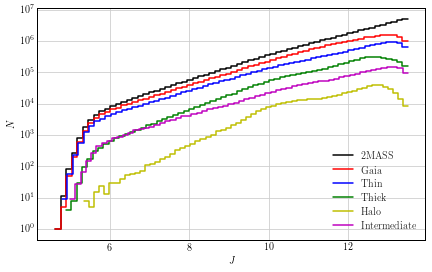

In [30]:
# compare
tmass.viz.histogram("Jmag", c='k', label="2MASS")
gaia.viz.histogram("Jmag", c='r', label="Gaia")
df_thin.viz.histogram("Jmag", c='b', label="Thin")
df_thick.viz.histogram("Jmag", c='g', label="Thick")
df_halo.viz.histogram("Jmag", c='y', label="Halo")
df_intermediate.viz.histogram("Jmag", c='m', label="Intermediate")
plt.yscale('log')
plt.legend()
plt.xlabel(r"$J$")
plt.ylabel(r"$N$")
# plt.savefig("Jmag-count.pdf")
plt.show()

In [31]:
# partition in J and J-K
eJ = np.linspace(4, 13.5, 51)
eJK = np.linspace(-1, 2, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [32]:
gaiaH, _, _ = np.histogram2d(df_thin["JK"].to_numpy(), df_thin["Jmag"].to_numpy(), bins=(eJK, eJ))
gaiaH = gaiaH.T
tmassH, _, _ = np.histogram2d(tmass["JK"].to_numpy(), tmass["Jmag"].to_numpy(), bins=(eJK, eJ))
tmassH = tmassH.T
comp = np.nan_to_num(gaiaH/tmassH)
more_than_one = comp > 1
comp[more_than_one] = 1
comp

<ipython-input-32-ace5acd338b6>:5: RuntimeWarning: invalid value encountered in divide
  comp = np.nan_to_num(gaiaH/tmassH)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.11349718e-04, 4.00753416e-05, 1.02883305e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.83311794e-05, 7.17463051e-05, 2.30393512e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.52930425e-05, 4.67792487e-05, 2.03359499e-05]])

Text(0, 0.5, 'J')

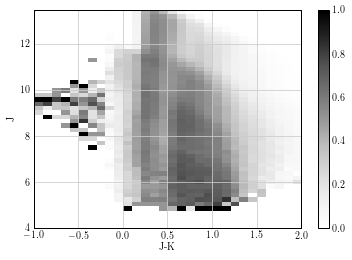

In [33]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")

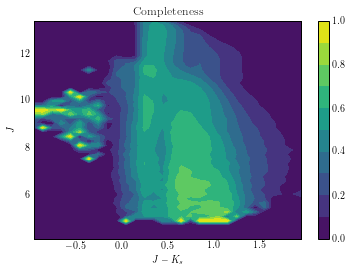

In [34]:
# plot countour tmassH
plt.contourf(JK, J, comp, levels=np.arange(0, 1.1, 0.1), cmap="viridis")
plt.colorbar()
plt.title("Completeness")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$J$")
plt.savefig("completeness.pdf")

In [40]:
df = []
N = len(comp[:, 0])
for i, (jk, jk_low, jk_high) in enumerate(zip( JK, eJK[:-1], eJK[1:])):
    df_new = vaex.from_dict({
        "comp": comp[:, i], 
        "JK": jk*np.ones(N) ,
        "JK_low": jk_low*np.ones(N), 
        "JK_high": jk_high*np.ones(N), 
        "J": J, 
        "J_low": eJ[:-1], 
        "J_high": eJ[1:]
      })
    if len(df) == 0:
        df = df_new
    else:
        df = df.concat(df_new)
df

#,comp,JK,JK_low,JK_high,J,J_low,J_high
0,0.0,-0.95,-1.0,-0.9,4.095000000000001,4.0,4.19
1,0.0,-0.95,-1.0,-0.9,4.285,4.19,4.38
2,0.0,-0.95,-1.0,-0.9,4.475,4.38,4.57
3,0.0,-0.95,-1.0,-0.9,4.665,4.57,4.76
4,0.0,-0.95,-1.0,-0.9,4.855,4.76,4.95
...,...,...,...,...,...,...,...
"1,495",9.701830412004398e-05,1.9500000000000002,1.9000000000000004,2.0,12.645,12.55,12.74
"1,496",0.00011669292257424587,1.9500000000000002,1.9000000000000004,2.0,12.835,12.74,12.93
"1,497",0.00010288330461174412,1.9500000000000002,1.9000000000000004,2.0,13.025,12.93,13.120000000000001
"1,498",2.3039351211869873e-05,1.9500000000000002,1.9000000000000004,2.0,13.215,13.120000000000001,13.31


In [41]:
df.export(join(data_dir, "completeness.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.11s =  0.0m =  0.0h
 